In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

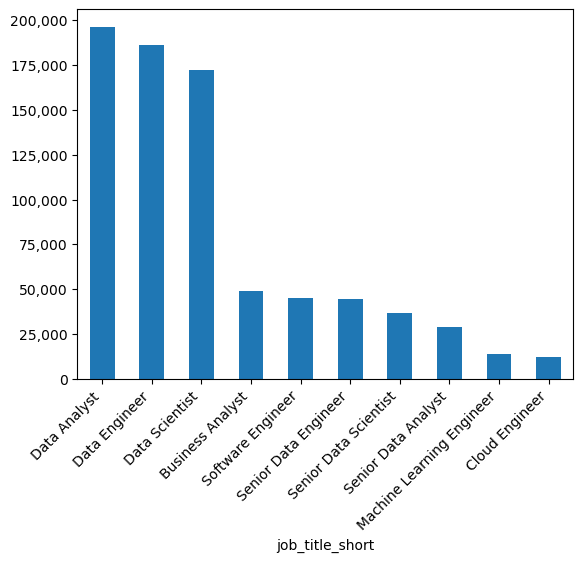

In [3]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
plt.xticks(rotation=45, ha='right')
plt.show()

In [4]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

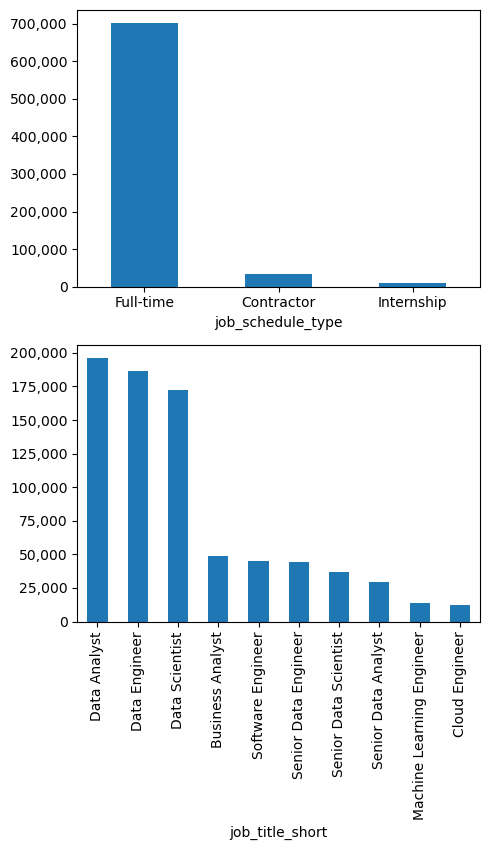

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

ax[0].tick_params(axis='x', rotation=360, labelright=False)
ax[1].tick_params(axis='x', rotation=90, labelright=False)

ax[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax[1].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

fig.tight_layout(rect=[0.5,0.1,1,0.96])

In [5]:
df_skills = df.copy()

df_skills = df_skills.explode('job_skills')

skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by = 'skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [6]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

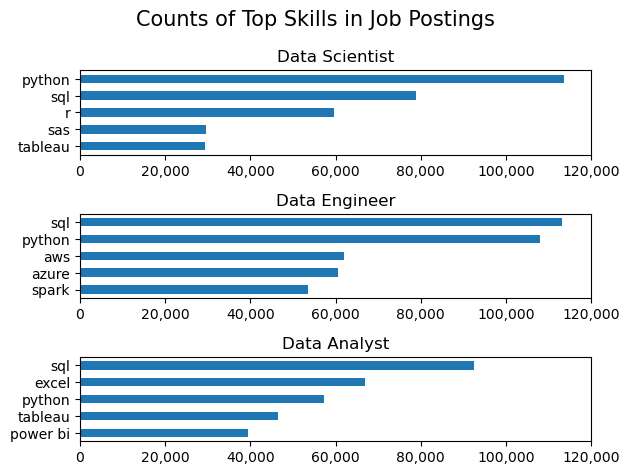

In [15]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
   df_plot =  df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
   df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0, 120000)
   ax[i].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))




fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
